# Business Sales Analysis - Superstore Dataset

## Objective
The goal of this analysis is to explore sales, profit, product performance, regional trends and pricing strategies using a retail superstore dataset. This project aims to identify key business drivers, loss-making areas and opportunities for optimization through data driven insights.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Dataset Overview

This dataset contains transactional sales data from a retail superstore, including information on orders, customers, regions, product categories, discounts, and profitability.

In [179]:
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='latin1')
df.columns = df.columns.str.strip()
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [180]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

The dataset includes order details, customer information, geographical regions, product hierarchy (Category and Sub-Category), sales metrics, discount levels, and profit values.

## Data Cleaning & Preparation

In [181]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [182]:
df.duplicated().sum()

np.int64(0)

In [183]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [184]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [185]:
df = df.assign(
    Order_Year = df['Order Date'].dt.year,
    Order_Month = df['Order Date'].dt.month,
    Order_Month_Name = df['Order Date'].dt.month_name()
)

df[['Order Date', 'Order_Year', 'Order_Month',  'Order_Month_Name']].head()


,Order Date,Order_Year,Order_Month,Order_Month_Name
0,2016-11-08,2016,11,November
1,2016-11-08,2016,11,November
2,2016-06-12,2016,6,June
3,2015-10-11,2015,10,October
4,2015-10-11,2015,10,October


Before performing any analysis, the dataset was checked for missing values, duplicate records, and correct data types to ensure data quality and reliability of insights.

## Year-wise Sales & Profit Trends

To understand overall business growth, year-wise sales and profit trends were analyzed to identify patterns, growth phases, and any fluctuations over time.

In [186]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit

#this gives us total sales and total profit

(np.float64(2297200.8603), np.float64(286397.0217))

In [187]:
sales_by_year = df.groupby('Order_Year')['Sales'].sum().reset_index()
sales_by_year

#is the business growing or not?

,Order_Year,Sales
0,2014,"484,247.50"
1,2015,"470,532.51"
2,2016,"609,205.60"
3,2017,"733,215.26"


In [188]:
# Yearly Profit Trends

profit_by_year = df.groupby('Order_Year')['Profit'].sum().reset_index()
profit_by_year

# is the business profitable?

,Order_Year,Profit
0,2014,"49,543.97"
1,2015,"61,618.60"
2,2016,"81,795.17"
3,2017,"93,439.27"


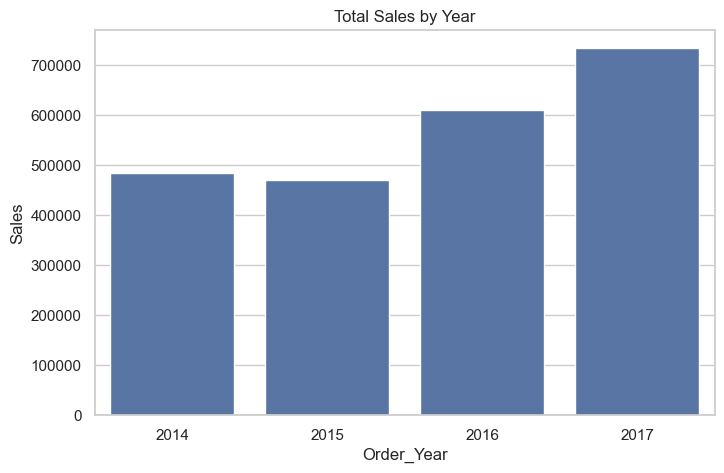

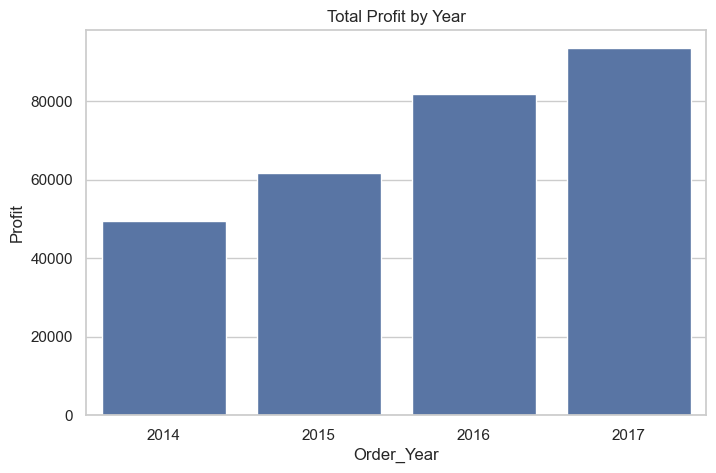

In [189]:
plt.figure(figsize=(8,5))
sns.barplot(x='Order_Year', y= 'Sales', data=sales_by_year)
plt.title('Total Sales by Year')
plt.show()

# Year by Sales plot

plt.figure(figsize=(8,5))
sns.barplot(x='Order_Year', y= 'Profit', data=profit_by_year)
plt.title('Total Profit by Year')
plt.show()

# Year by Profit plot

**Observations:**
- Sales show a general upward trend over the years with a slight dip in 2015.
- Profit follows a similar pattern, indicating healthy business growth overall.
- The increase in profit despite a minor sales dip suggests improved operational efficiency or product mix during that period.

## Category Level Performance

This section analyzes performance across major product categories to identify which categories drive revenue and profitability.


In [190]:
# Category wise sales and profit analysis

category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

category_sales
category_profit

,Category,Profit
0,Furniture,"18,451.27"
1,Office Supplies,"122,490.80"
2,Technology,"145,454.95"


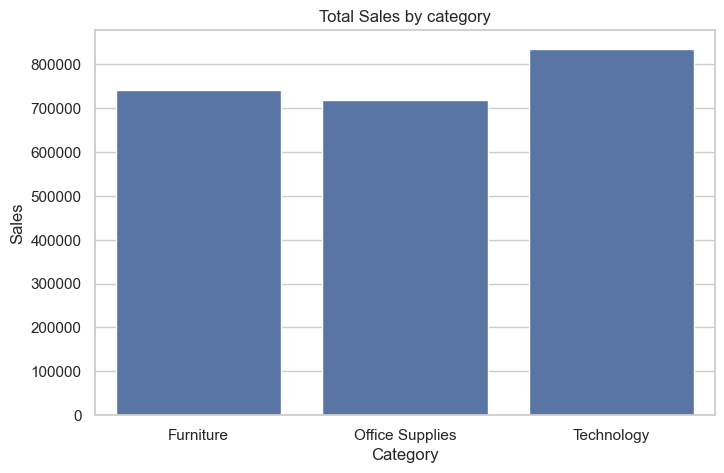

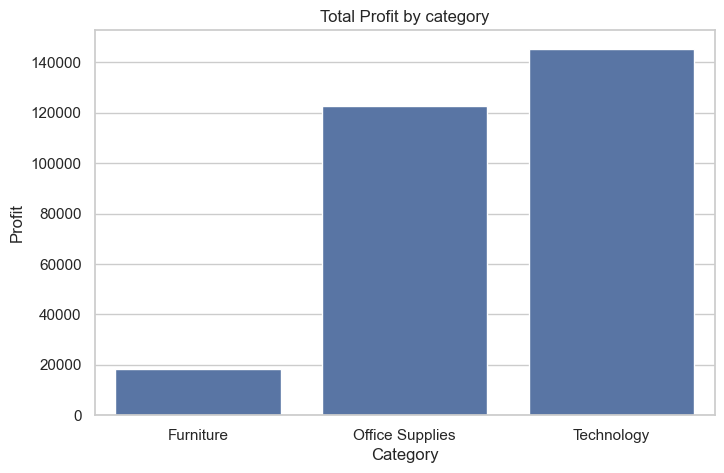

In [191]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by category')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by category')
plt.show()

**Observations:**
- Technology is the highest revenue and profit-generating category.
- Office Supplies also contribute significantly to profit.
- Furniture shows strong sales but weak profitability, indicating margin issues within the category.


## Sub-Category Level (Root Cause) Analysis

To understand why certain categories underperform, a deeper analysis was conducted at the sub-category level focusing on profit and discount patterns.

In [192]:
# Sub-Category wise sales and profit analysis

subcat_profit = (
    df.groupby(['Category', 'Sub-Category'], observed=True)['Profit']
      .sum()
      .reset_index()
      .sort_values(by='Profit')
)

subcat_profit

,Category,Sub-Category,Profit
3,Furniture,Tables,"-17,725.48"
0,Furniture,Bookcases,"-3,472.56"
12,Office Supplies,Supplies,"-1,189.10"
8,Office Supplies,Fasteners,949.52
15,Technology,Machines,"3,384.76"
9,Office Supplies,Labels,"5,546.25"
5,Office Supplies,Art,"6,527.79"
7,Office Supplies,Envelopes,"6,964.18"
2,Furniture,Furnishings,"13,059.14"
4,Office Supplies,Appliances,"18,138.01"


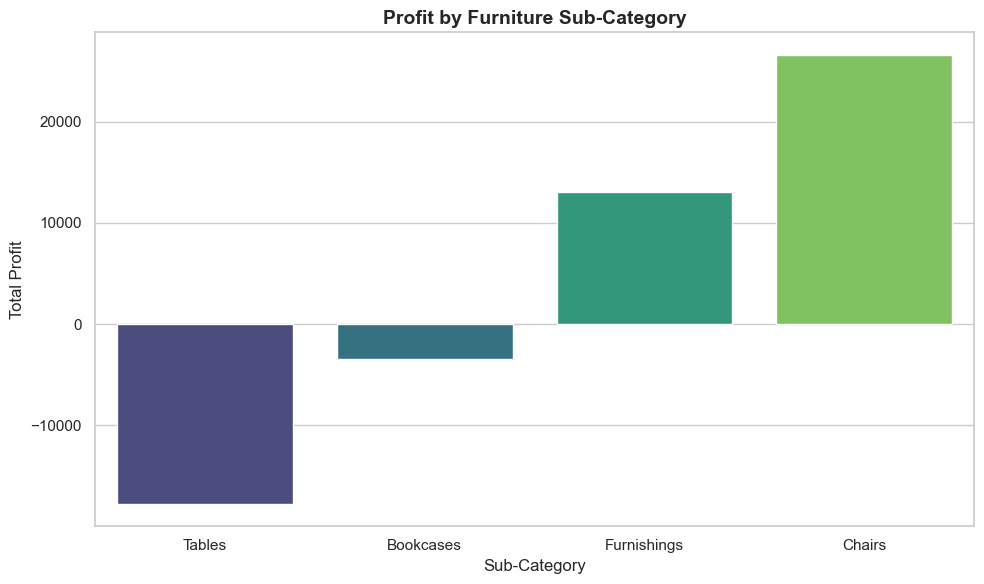

In [193]:
furniture_data = subcat_profit[subcat_profit['Category'] == 'Furniture']

plt.figure(figsize=(10,6))
sns.barplot(
    x='Sub-Category',
    y='Profit',
    data=furniture_data,
    hue='Sub-Category',
    palette='viridis',
    legend=False
)
plt.title('Profit by Furniture Sub-Category', fontsize=14, weight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


**Key Findings:**
- Tables and Bookcases are consistently loss-making despite high discounts, indicating structural margin issues.
- Supplies and Binders show heavy discounting, reducing overall category profitability.
- Machines and Furnishings also experience discount pressure affecting margins.
- Copiers emerge as high-performing products with strong profitability and controlled discounting.

These sub-categories are major contributors to category-level profit erosion and should be prioritized for pricing and product mix review.


## Region-wise Sales & Profit Performance

Geographical analysis was conducted to identify regional strengths and weaknesses in sales and profitability.


In [194]:
# Region wise sales and profit analysis

region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

region_sales, 
region_profit

,Region,Profit
0,Central,"39,706.36"
1,East,"91,522.78"
2,South,"46,749.43"
3,West,"108,418.45"


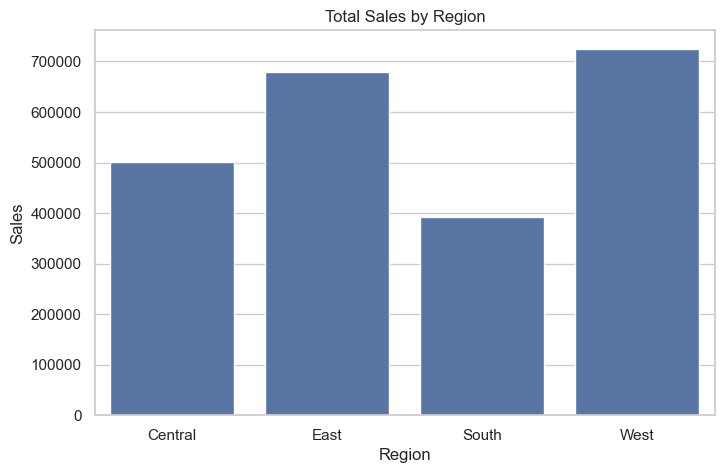

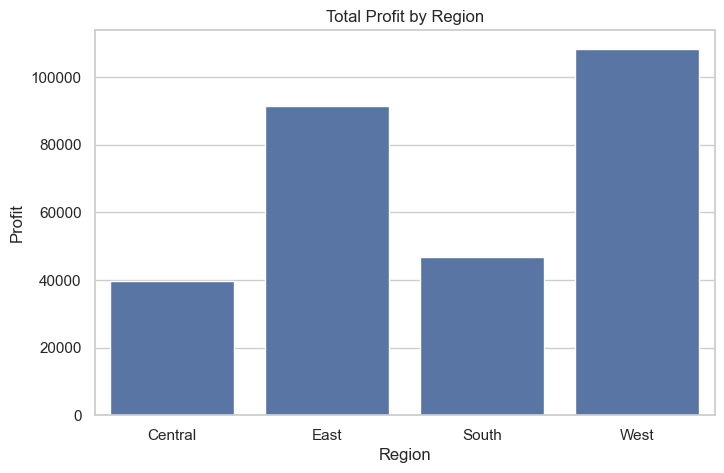

In [195]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y= 'Sales', data = region_sales)
plt.title('Total Sales by Region')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y= 'Profit', data = region_profit)
plt.title('Total Profit by Region')
plt.show()

**Observations:**
- The West region is the strongest performer in both sales and profit.
- East region follows as the second strongest.
- Central and South regions show significantly lower profitability, suggesting operational or pricing challenges.


## Discount vs Profit Analysis

This section explores the relationship between discounting strategies and profitability to assess the effectiveness of pricing decisions.


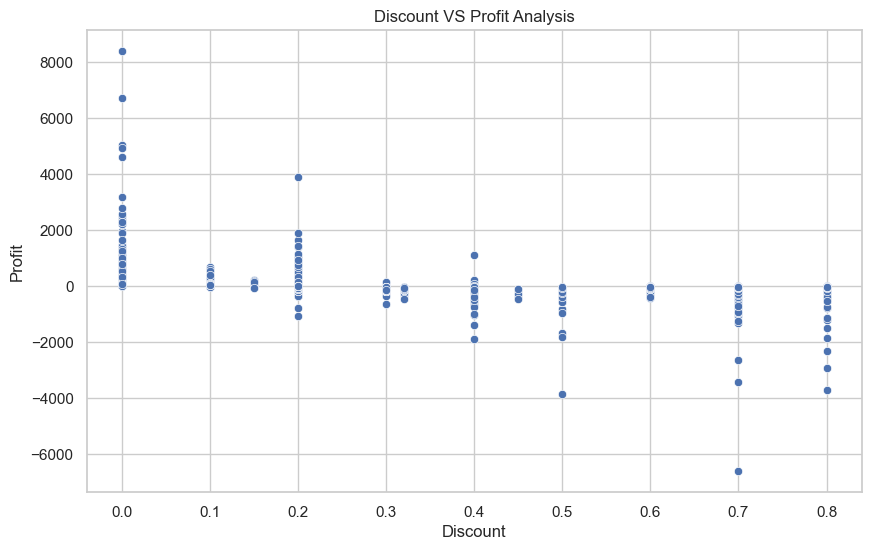

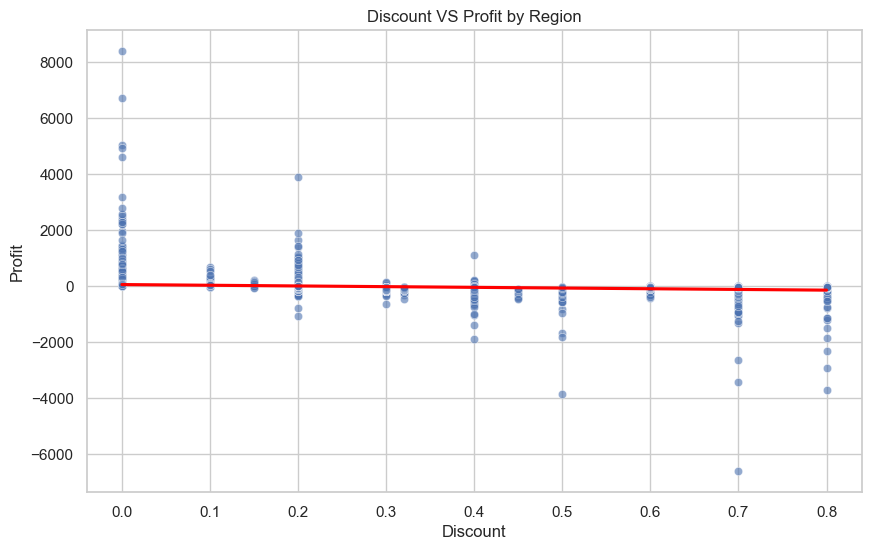

In [196]:
# Discount vs Profit analysis

plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data= df)
plt.title('Discount VS Profit Analysis')
plt.show()

plt.figure(figsize = (10,6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
sns.regplot(x='Discount', y='Profit', data=df, scatter=False, color='red')
plt.title('Discount VS Profit by Region')
plt.show()

**Insights:**
- Higher discounts are strongly associated with lower or negative profits, particularly in Central and South regions.
- The West region maintains healthier profitability with relatively lower discounts.
- Excessive discounting on low-margin products contributes to significant losses.

## Discount vs Profit Analysis

This section explores the relationship between discounting strategies and profitability to assess the effectiveness of pricing decisions.

In [197]:
# Average Discount by Region

discount_by_region = df.groupby('Region')['Discount'].mean().reset_index()
discount_by_region

,Region,Discount
0,Central,0.24
1,East,0.15
2,South,0.15
3,West,0.11


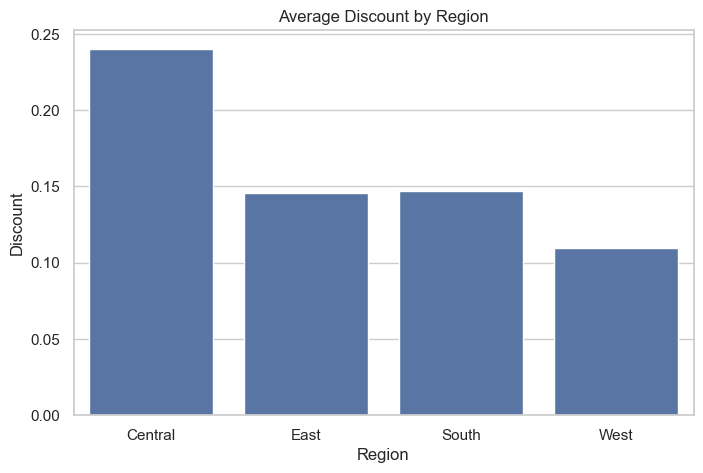

In [198]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Discount', data = discount_by_region)
plt.title('Average Discount by Region')
plt.show()

**Insights:**
- Higher discounts are strongly associated with lower or negative profits, particularly in Central and South regions.
- The West region maintains healthier profitability with relatively lower discounts.
- Excessive discounting on low-margin products contributes to significant losses.

### Sub-Category Level Profitability & Discount Analysis

In [199]:
subcat_stats = df.groupby('Sub-Category')[['Discount','Profit','Sales']].mean().reset_index()
subcat_stats = subcat_stats.sort_values(by='Profit')
subcat_stats

,Sub-Category,Discount,Profit,Sales
16,Tables,0.26,-55.57,648.79
4,Bookcases,0.21,-15.23,503.86
15,Supplies,0.08,-6.26,245.65
8,Fasteners,0.08,4.38,13.94
2,Art,0.07,8.20,34.07
9,Furnishings,0.14,13.65,95.83
10,Labels,0.07,15.24,34.30
3,Binders,0.37,19.84,133.56
12,Paper,0.07,24.86,57.28
14,Storage,0.07,25.15,264.59


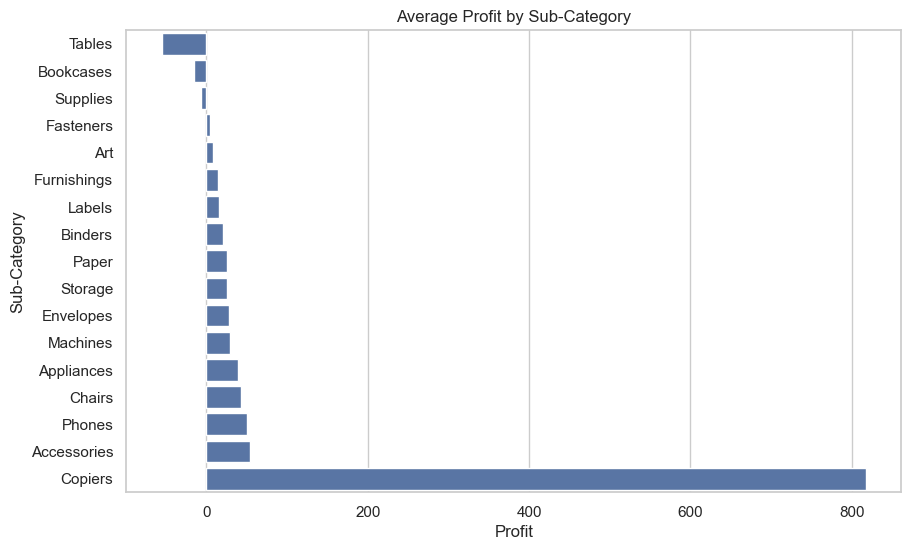

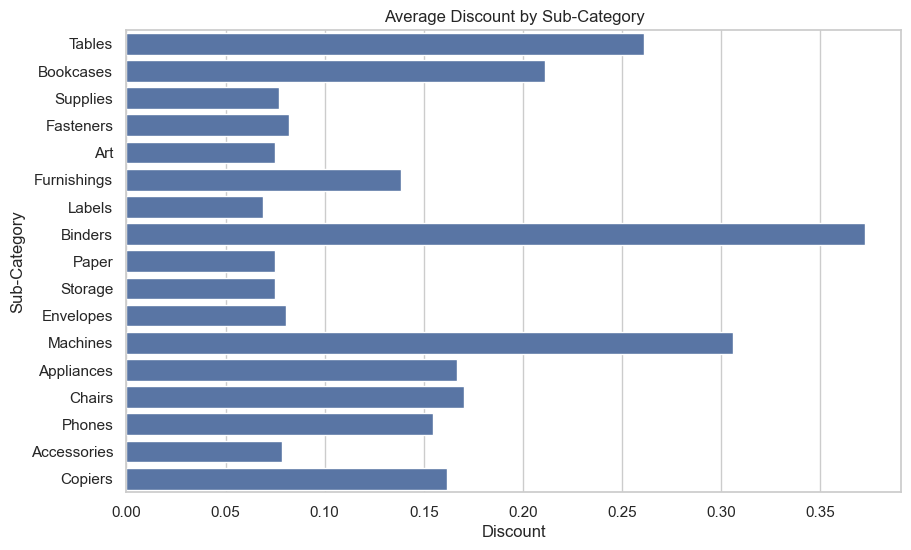

In [200]:
#sub-category vs profit 

plt.figure(figsize=(10,6))
sns.barplot(y='Sub-Category', x='Profit', data = subcat_stats)
plt.title('Average Profit by Sub-Category')
plt.show()

#sub-category vs discount 

plt.figure(figsize=(10,6))
sns.barplot(y='Sub-Category', x='Discount', data = subcat_stats)
plt.title('Average Discount by Sub-Category')
plt.show()

In [201]:
loss_subcats = subcat_stats[subcat_stats['Profit'] < 0]
loss_subcats

,Sub-Category,Discount,Profit,Sales
16,Tables,0.26,-55.57,648.79
4,Bookcases,0.21,-15.23,503.86
15,Supplies,0.08,-6.26,245.65


Detailed analysis at the sub-category level reveals that not all products contribute equally to overall profitability.

Key observations:
- Tables and Bookcases are consistently loss-making despite receiving high discounts, indicating fundamental margin issues.
- Supplies and Binders show heavy discounting which significantly reduces profitability, even though the Office Supplies category overall is profitable.
- Machines and Furnishings also exhibit discount pressure that suppresses category-level profits.
- Copiers stand out as a high-performing sub-category, achieving strong profitability with controlled discounting.

Business Implications:
- Discount strategies for Tables, Bookcases, Supplies, and Binders should be reviewed or reduced.
- Product mix in loss-making sub-categories needs reassessment.
- Investment and promotional focus can be increased for high-margin products like Copiers.


## Deep Dive into the Categorical Data

### Multi-Metric Category Comparison (Radar Analysis)


In [202]:
# Normalising the Categorical data
import sklearn

from sklearn.preprocessing import MinMaxScaler

#Aggregate metrics
cat_metrics = df.groupby('Category')[['Sales', 'Profit', 'Discount']].mean().reset_index()

# Normalization
scaler = MinMaxScaler()
#cat_scaled = cat_metrics.copy()
scaled_values = scaler.fit_transform(cat_metrics[['Sales', 'Profit', 'Discount']])
#cat_scaled

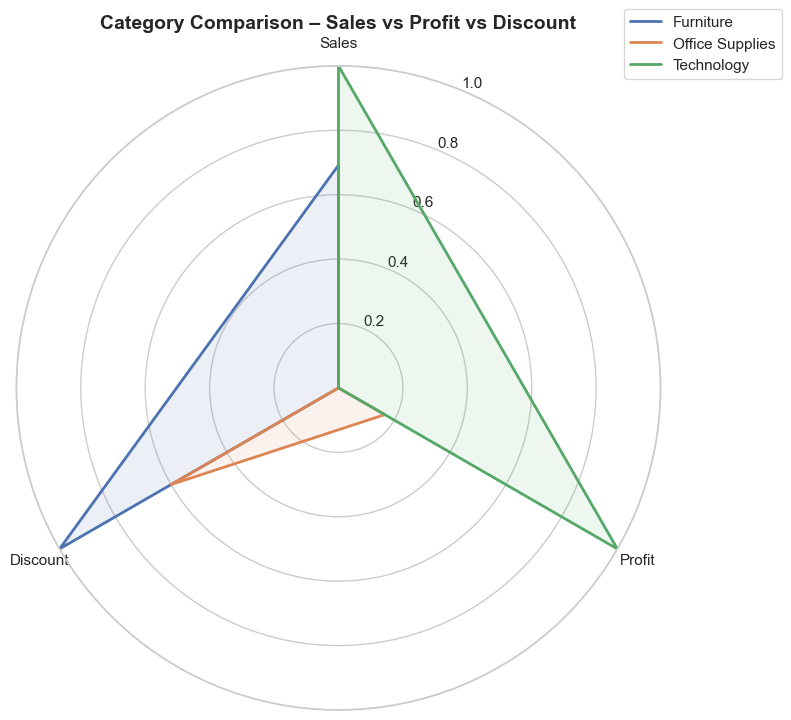

In [203]:
#Radar Plot

labels = ['Sales','Profit', 'Discount']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

ax.set_ylim(0, 1)

for i in range(len(cat_metrics)):
    values = scaled_values[i].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=cat_metrics['Category'][i])
    ax.fill(angles, values, alpha=0.1)

ax.set_title('Category Comparison – Sales vs Profit vs Discount', fontsize=14, weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


### Category Comparison – Sales, Profit and Discount

To understand the trade-offs between revenue, profitability, and pricing strategy, a radar chart was used to compare Sales, Profit, and Discount across the three main product categories.

This multi-dimensional view highlights how each category balances volume, margin, and discounting.

**Key Observations:**
- **Technology** shows strong performance across both Sales and Profit with moderate discounting, indicating healthy demand and high-margin products. This category acts as the primary growth and profit driver for the business.
- **Furniture** demonstrates high Sales combined with heavy Discounting and very weak Profit. This suggests that sales in this category are largely discount-driven, resulting in margin erosion and structurally weak profitability.
- **Office Supplies** exhibits moderate Sales and Profit but relatively high Discount levels, indicating thin margins and a reliance on discounting to maintain volume.

**Business Interpretation:**
The radar analysis visually confirms that Furniture growth is achieved at the cost of profitability, while Technology achieves both volume and margin. Office Supplies operates in a low-margin environment with limited pricing power.

This insight supports the need for pricing strategy review and product mix optimization, particularly within the Furniture and Office Supplies categories.


## Final Business Insights & Recommendations

Based on the comprehensive analysis, the following key insights were derived:

- Overall sales and profit show positive growth trends.
- Technology and Office Supplies are the primary profit drivers.
- Furniture category profitability is dragged down by loss-making sub-categories such as Tables and Bookcases.
- Aggressive discounting in Central and South regions negatively impacts profitability.
- Copiers represent a high-margin opportunity and should be promoted further.
- Discount strategies for Supplies, Binders, and loss-making Furniture items should be reviewed.

**Recommendations:**
- Reassess discount policies for low-margin sub-categories.
- Optimize product mix in underperforming regions.
- Increase focus on high-margin products and regions.